In [ ]:
#Random-Forest-Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")
print (df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
df=pd.get_dummies(df, columns=['Gender'])
print(df)

      User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0    15624510   19            19000          0          False         True
1    15810944   35            20000          0          False         True
2    15668575   26            43000          0           True        False
3    15603246   27            57000          0           True        False
4    15804002   19            76000          0          False         True
..        ...  ...              ...        ...            ...          ...
395  15691863   46            41000          1           True        False
396  15706071   51            23000          1          False         True
397  15654296   50            20000          1           True        False
398  15755018   36            33000          0          False         True
399  15594041   49            36000          1           True        False

[400 rows x 6 columns]


In [ ]:
x=df.drop(["User ID","Purchased"],axis=1)
y=df["Purchased"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Building Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42,bootstrap=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
#View Bootstrap Samples
n_samples = x.shape[0]
for i, estimator in enumerate(classifier.estimators_):
    rng = np.random.RandomState(estimator.random_state)
    sample_indices = rng.choice(n_samples, size=n_samples, replace=True)
    bootstrap_sample = x.iloc[sample_indices]
    print(f"\nBootstrap sample for tree {i}:")
    print(bootstrap_sample)


Bootstrap sample for tree 0:
     Age  EstimatedSalary  Gender_Female  Gender_Male
41    33            51000           True        False
378   41            87000          False         True
332   42            65000          False         True
130   31            58000          False         True
393   60            42000          False         True
..   ...              ...            ...          ...
48    30           135000          False         True
124   41            51000           True        False
119   41            59000          False         True
368   38            71000          False         True
339   39           122000          False         True

[400 rows x 4 columns]

Bootstrap sample for tree 1:
     Age  EstimatedSalary  Gender_Female  Gender_Male
174   34            72000           True        False
151   41            45000          False         True
279   50            36000           True        False
31    27           137000           True        Fals

Accuracy: 91.67%


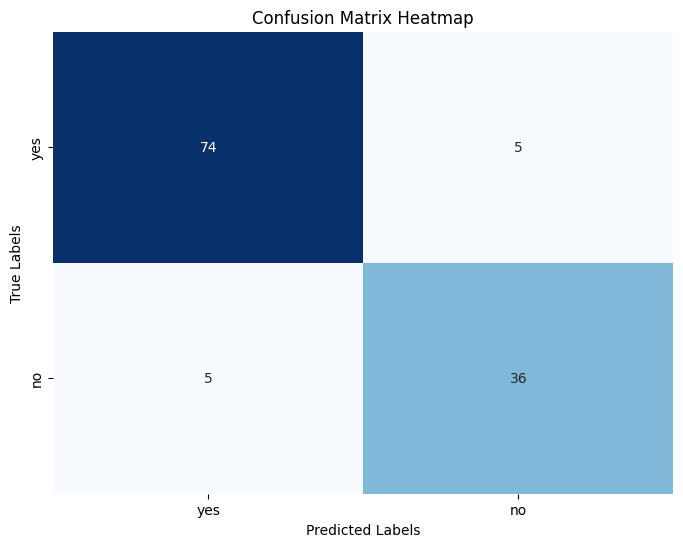

In [ ]:
#Evaluation of the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=["yes","no"], yticklabels=["yes","no"])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()